# Customer Churn Prediction Project

[Kaggle](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn)
### **Objective**
- By predicting which customers are at risk of leaving, the business can take proactive, data-driven actions to improve customer retention, which is often more cost-effective than acquiring new customers.

### **How**
- Identifies At-Risk Customers: The machine learning model identifies customers with a high probability of churning. This allows the bank's marketing or customer service teams to focus their retention efforts on a specific, high-risk group.

- Enables Targeted Interventions: The analysis of factors contributing to churn can help the bank design specific campaigns or offers. For example, if the analysis shows that customers with low credit scores and a high number of products are at high risk, the bank could offer a special credit counseling service or loyalty reward program to that specific segment.

- Provides Actionable Insights: The project goes beyond just a prediction by providing insights into why customers churn. By examining the model's feature importance and conducting exploratory data analysis, the bank can understand the key drivers (e.g., poor credit score, low satisfaction, low balance). These insights can be used to improve products, services, and overall customer experience.

- Measures Performance: The use of a classification report and confusion matrix allows the bank to quantify the model's effectiveness. This provides a clear metric for success and helps in understanding the trade-offs between precision and recall, which is essential for making informed business decisions.

## **Data Import and Initial Overview**

**Objective:** 
- Establish a foundational understanding of the dataset to guide subsequent analysis.

**Actions:**

1. **Load and Inspect:**
    - Import necessary libraries: `import`
    - Load the dataset: `pd.read_csv('file.csv')` 
    - Check data dimensions: `.shape`
    - Preview initial rows: `.head()`
    - Examine data types: `.info()`
    - Summarize numerical variables: `.describe()`

**Rationale:**

- **Thorough understanding:** This step ensures a thorough understanding of the data's structure, size, and characteristics, which is crucial for subsequent analysis.
- **Data quality:** Addressing missing values and inconsistencies early on ensures the reliability and accuracy of the analysis.
- **Informed decision-making:** By understanding the data's limitations and strengths, I can make informed decisions about the appropriate analytical techniques and the types of insights that can be extracted.

In [94]:
# Import necessary libraries for the project
import pandas as pd                                                 # For data manipulation and analysis
import numpy as np                                                  # For numerical computing and array operations
import matplotlib.pyplot as plt                                     # For creating static, interactive, and animated visualizations
import seaborn as sns                                               # For creating informative and attractive statistical graphics
from sklearn.model_selection import train_test_split                # For splitting data into training and testing sets
from sklearn.ensemble import RandomForestClassifier                 # For building Random Forest classification models
from sklearn.metrics import classification_report, confusion_matrix # For evaluating model performance

## Step 1: Load Data

In [95]:
# Load the data 
data = pd.read_csv('Customer-Churn-Records.csv')

In [87]:
# Check Dimensions
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

Rows: 10000, Columns: 18


In [15]:
# Preview the data
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [96]:
# Reviewing data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [21]:
# Summary statistics for numerical data types
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [98]:
# Drop irrelevant rows for analysis
data.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1, inplace=True)

---
## **Step 2: Data Cleaning**

**Objective:** 

- Ensure data quality and integrity for reliable analysis.

**Actions:**

1. **Handle Missing Values:**
    - **Identify Missing Values:**
        - `missing_values = data.isnull().sum()` 
        - `print("Missing Values:\n", missing_values)`
    - **Handle Missing Data:**
        - **Imputation:** For numerical variables, consider methods like mean/median imputation, or more sophisticated techniques like KNN imputation.
        - **Removal:** If missing values are significant or patterns suggest data bias, consider removing rows or columns with a high percentage of missing values. 
        - **Domain-Specific Methods:** Choose imputation or removal strategies based on the specific characteristics of the data and the research question.

2. **Identify and Handle Duplicates:**
    - **Identify Duplicates:**
        - `num_duplicates = data.duplicated().sum()`
        - `print("Number of Duplicates:", num_duplicates)`
    - **Remove Duplicates:**
        - `data = data.drop_duplicates()`

3. **Data Consistency Checks:**
    - **Check for invalid values:** 
        - For example, negative values for variables that should only be positive (e.g., age, sales).
        - Correct or remove invalid values based on domain knowledge.
    - **Ensure consistent formatting:** 
        - Convert data types as needed (e.g., convert categorical variables to appropriate data types).
        - Standardize units (e.g., convert currencies to a common unit).

**Rationale:**

- **Data Quality:** Clean data is essential for accurate and reliable analysis. Missing values and inconsistencies can introduce bias and lead to misleading results.
- **Robust Analysis:** By addressing data quality issues early on, I can ensure that my analysis is built on a solid foundation, leading to more accurate and trustworthy insights.
- **Improved Decision-Making:** Clean data enables me to make more informed business decisions based on reliable and accurate information.

In [36]:
# Identify and handle missing values
data.isnull().sum()


RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [88]:
# Identify and handle duplicates
if data.duplicated().sum() == 0:
    print("No duplicate values.")
else:
    print(f"Found {data.duplicated().sum()} duplicate rows.")

No duplicate values.


In [89]:
# Data type conversion

# Converting categories to 'category' data type for analysis
categorical_columns = ['Geography', 'Gender', 'Satisfaction Score', 'Card Type']
for column in categorical_columns:
    data[column] = data[column].astype('category')

# Converting Binary columns to 'bool'
binary_columns = ['HasCrCard', 'IsActiveMember', 'Exited', 'Complain']
for column in binary_columns:
    data[column] = data[column].astype('bool')

# Confirm changes are correct and review data types
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   RowNumber           10000 non-null  int64   
 1   CustomerId          10000 non-null  int64   
 2   Surname             10000 non-null  object  
 3   CreditScore         10000 non-null  int64   
 4   Geography           10000 non-null  category
 5   Gender              10000 non-null  category
 6   Age                 10000 non-null  int64   
 7   Tenure              10000 non-null  int64   
 8   Balance             10000 non-null  float64 
 9   NumOfProducts       10000 non-null  int64   
 10  HasCrCard           10000 non-null  bool    
 11  IsActiveMember      10000 non-null  bool    
 12  EstimatedSalary     10000 non-null  float64 
 13  Exited              10000 non-null  bool    
 14  Complain            10000 non-null  bool    
 15  Satisfaction Score  10000 non-null  c

In [92]:
# Understanding categorical data columns
for col in data.select_dtypes(include=['object', 'category']).columns:
             print(f"Unique values in '{col}': {data[col].unique()}")

Unique values in 'Geography': ['France', 'Spain', 'Germany']
Categories (3, object): ['France', 'Germany', 'Spain']
Unique values in 'Gender': ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
Unique values in 'Satisfaction Score': [2, 3, 5, 4, 1]
Categories (5, int64): [1, 2, 3, 4, 5]
Unique values in 'Card Type': ['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM']
Categories (4, object): ['DIAMOND', 'GOLD', 'PLATINUM', 'SILVER']


In [ ]:
# Checking for invalid values 
# Define conditions for numeric, categorical, and boolean columns
columns_conditions = {
    # Numeric columns
    'Age': lambda x: x >= 0,            # Age should be non-negative
    'CreditScore': lambda x: x >= 0,    # CreditScore should be non-negative
    'NumOfProducts': lambda x: x > 0,   # NumOfProducts should be positive
    'Point Earned': lambda x: x >= 0,   # Points should be non-negative
    
    # Categorical columns
    'Geography': lambda x: x in ['France', 'Germany', 'Spain'],            # Allowed countries
    'Gender': lambda x: x in ['Male', 'Female'],                           # Allowed genders
    'Card Type': lambda x: x in ['GOLD', 'SILVER', 'PLATINUM', 'DIAMOND'], # Allowed card types
    'Satisfaction Score': lambda x: x in [1, 2, 3, 4, 5],                  # Valid satisfaction scores (1-5)
    
    # Boolean columns
    'HasCrCard': lambda x: isinstance(x, bool),     # Should be boolean
    'IsActiveMember': lambda x: isinstance(x, bool),
    'Exited': lambda x: isinstance(x, bool),
    'Complain': lambda x: isinstance(x, bool),
}

# Dictionary to store invalid rows
invalid_values = {}

# Check each column using the defined conditions
for column, condition in columns_conditions.items():
    invalid_rows = data[~data[column].apply(condition)]  # Identify rows where the condition fails
    if not invalid_rows.empty:
        invalid_values[column] = invalid_rows  # Store invalid rows for the column

# Display results
for column, rows in invalid_values.items():
    print(f"Invalid values in '{column}':")
    print(rows)
    print()
else:
    print(f"No invalid values!")
    

No invalid values!


---
## **Step 3: Initial Analysis**

**Objective:** Understand the distribution and relationships between key variables in the dataset. Visualize when necessary.

**Actions:**

1. **Univariate Analysis:**
    - **Categorical Variables:**
        - Calculate frequency counts with: `.value_counts()`, visualize with `matplotlib.pyplot.pie()`.
        - Analyze the distribution of categorical variables.
    - **Numerical Variables:**
        - Visualize distributions using histograms: `seaborn.histplot()`.
        
2. **Bivariate Analysis:**
    - **Explore relationships between variables:**
        - **Categorical vs. Numerical:** 
            - Create a bar plot to visualize the relationship between two variables: `seaborn.barplot()`.
            - Calculate distribution of a categorical variable within a numerical variable with: `.groupby()`.
        - **Numerical vs. Numerical:**
            - Create a box plot to visualize the distribution and identify potential outliers with: `seaborn.boxplot()`.
            - Calculate and interpret summary statistics: `.describe()`.
            - Calculate correlation coefficients using `data.corr()`.
            - Visualize correlations using a heatmap with: `seaborn.heatmap(data.corr()`.
        - **Time Series**
            - Create a line plot to evaluate trends over time with: `seaborn.lineplot()`.
        - **Categorical vs. Categorical**
            - `crosstab()`: Create a contingency table to summarize the frequencies of observations in each combination of categories.
            - Chi-square test: Determine whether there is a statistically significant association between the two variables.
            - Determine whether the variables are independent or associated.

**Rationale:**

- **Understand Variable Distributions:** Univariate analysis helps to understand the distribution and characteristics of individual variables, such as central tendency, dispersion, and skewness.
- **Identify Relationships:** Bivariate analysis helps to identify potential relationships and dependencies between variables. This information is crucial for further analysis and model building.
- **Visual Exploration:** Visualizations provide a quick and intuitive way to understand the data and identify potential patterns and anomalie.

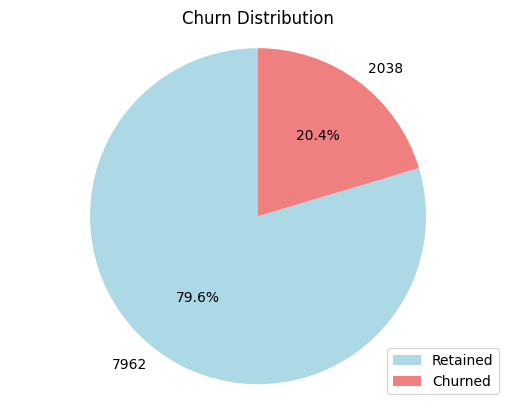

In [167]:
# Churn Distribution

# Create pie chart
churn_count = data['Exited'].value_counts() 
labels = ['Retained', 'Churned'] # Labels for the legend
patches, texts, autotexts = plt.pie(churn_count,
        labels=churn_count.values.tolist(),
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightblue','lightcoral'])

plt.axis('equal')
plt.title('Churn Distribution')
plt.legend(patches, labels, loc='lower right')
plt.show()

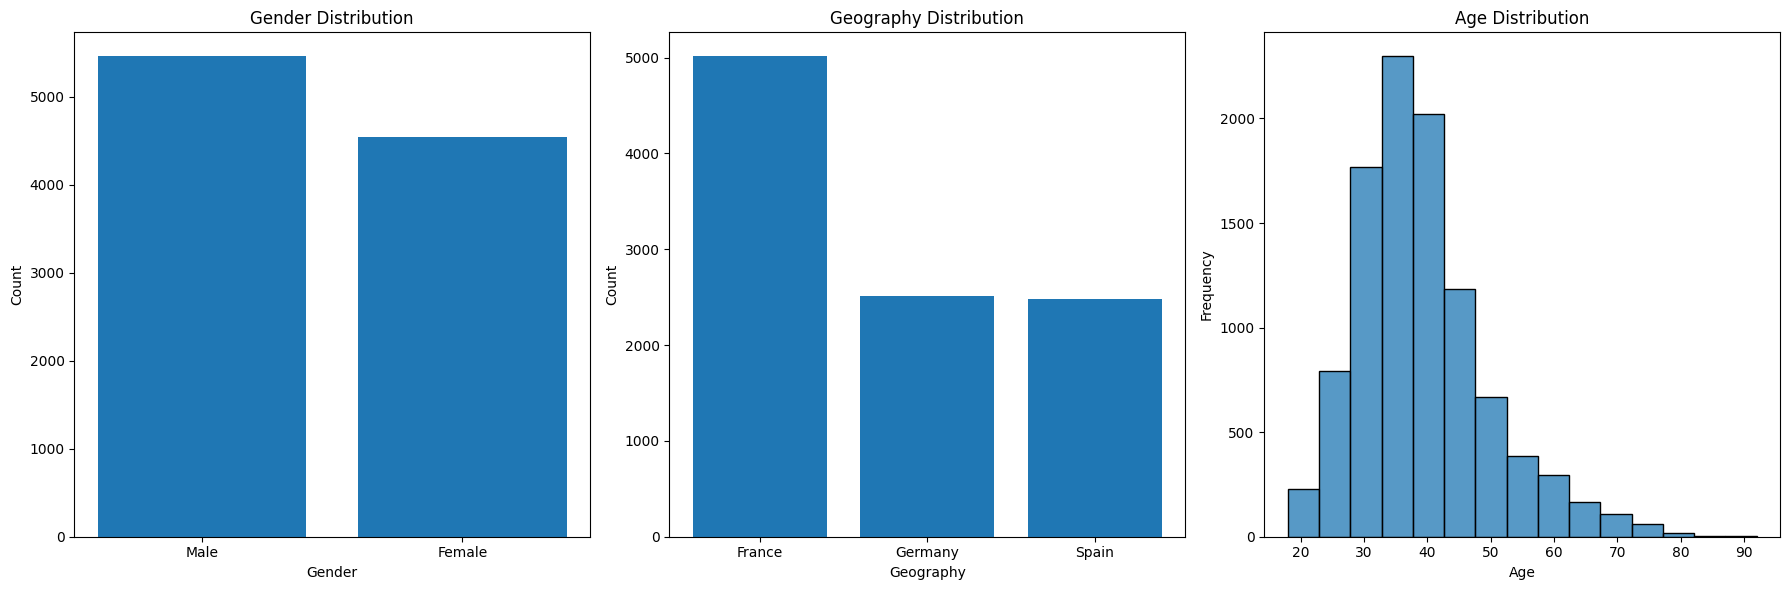

In [130]:
# Customer Demographics

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot Gender counts
gender_counts = data['Gender'].value_counts()
axes[0].bar(gender_counts.index, gender_counts)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_title('Gender Distribution')

# Plot Geography counts
geography_counts = data['Geography'].value_counts()
axes[1].bar(geography_counts.index, geography_counts)
axes[1].set_xlabel('Geography')
axes[1].set_ylabel('Count')
axes[1].set_title('Geography Distribution')

# Age (Numeric grouped into bins)
sns.histplot(
    data['Age'], bins=15, kde=False, ax=axes[2]
    )
axes[2].set_title("Age Distribution")
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

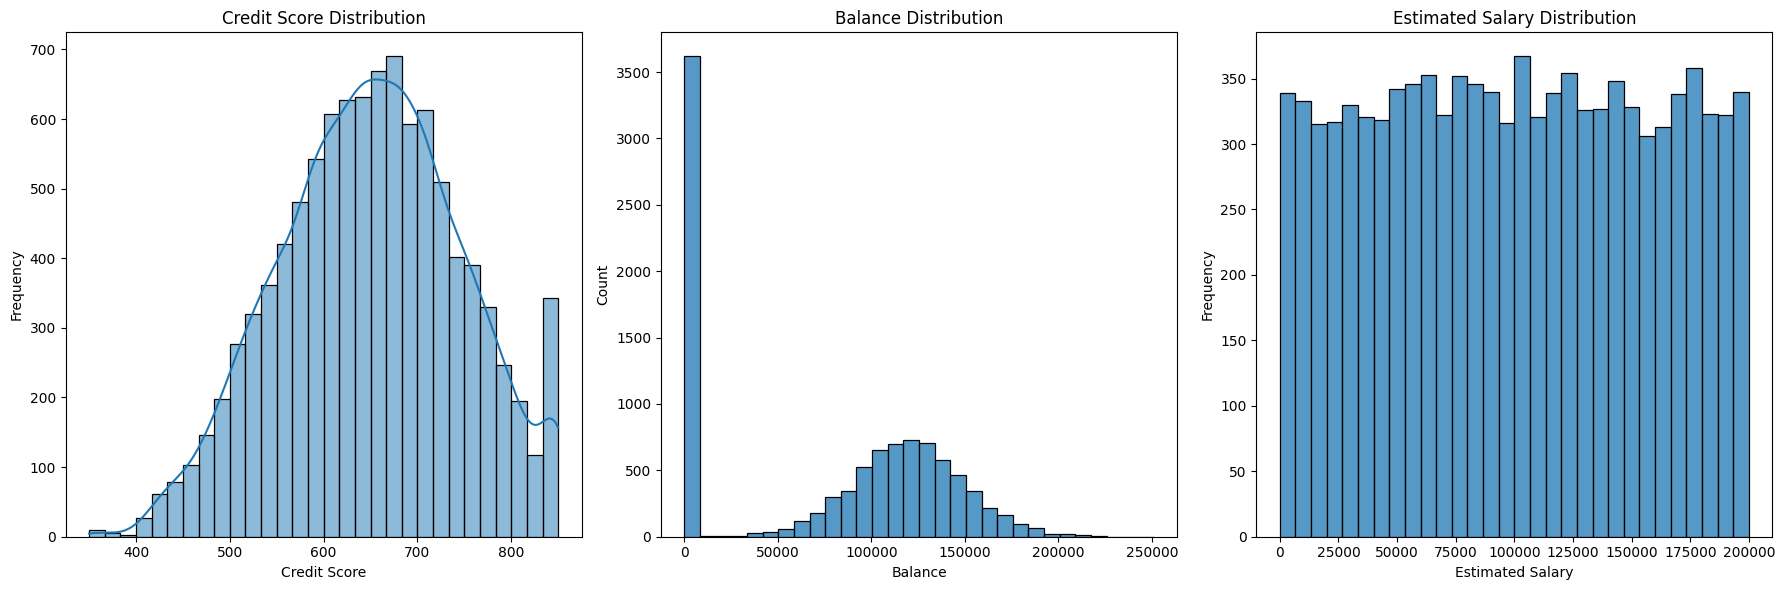

In [ ]:
# Customer Financial Metrics
# Create subplots 
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Credit Score (Histogram)
sns.histplot(
    data['CreditScore'], kde=True, bins=30, ax=axes[0]
    )
axes[0].set_title("Credit Score Distribution")
axes[0].set_xlabel("Credit Score")
axes[0].set_ylabel("Frequency")

# Satisfaction Score (Frequency Count - Bar Chart)
sns.histplot(
    data['Balance'], kde=False, bins=30, ax=axes[1]
    )
axes[1].set_xlabel('Balance')
axes[1].set_ylabel('Count')
axes[1].set_title('Balance Distribution')

# Estimated Salary (Histogram)
sns.histplot(
    data['EstimatedSalary'], kde=False, bins=30, ax=axes[2]
    )
axes[2].set_title("Estimated Salary Distribution")
axes[2].set_xlabel("Estimated Salary")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

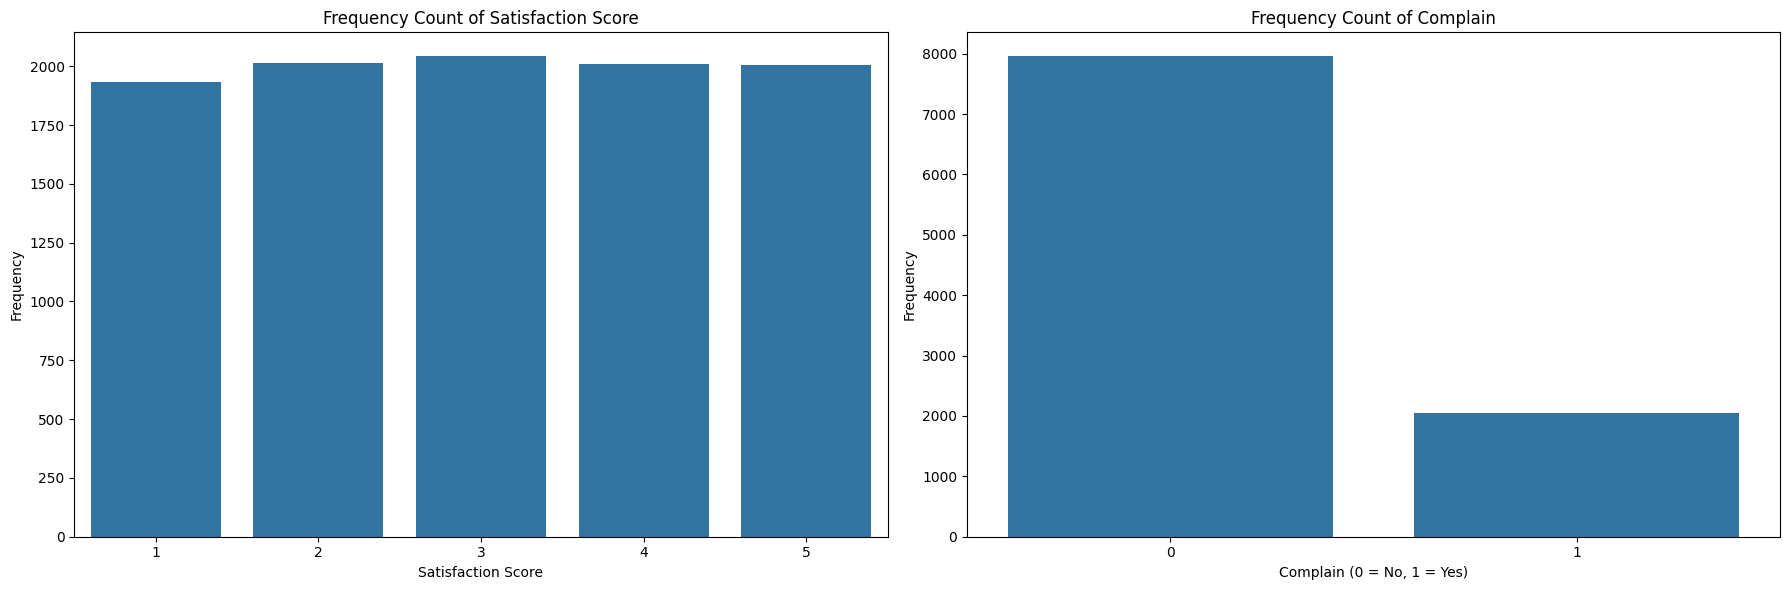

In [ ]:
# Customer Satisfaction
# Create subplots 
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Satisfaction Score (Frequency Count - Bar Chart)
sns.barplot(
    x=data['Satisfaction Score'].value_counts().index,
    y=data['Satisfaction Score'].value_counts().values,
    ax=axes[0]
    )
axes[0].set_title("Frequency Count of Satisfaction Score")
axes[0].set_xlabel("Satisfaction Score")
axes[0].set_ylabel("Frequency")

# Complain (Frequency Count - Bar Chart)
sns.barplot(
    x=data['Complain'].value_counts().index,
    y=data['Complain'].value_counts().values,
    ax=axes[1]
    )   
axes[1].set_title("Frequency Count of Complain")
axes[1].set_xlabel("Complain (0 = No, 1 = Yes)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [161]:
# Select columns of interest
columns = data[['Gender', 'Geography', 'Satisfaction Score', 'Complain']]

# Calculate and print summary statistics for each column
for column in columns:
    print(f"\nDistribution Statistics for '{column}':")
    counts = data[column].value_counts()
    percentages = (counts / len(columns)) * 100
    summary_df = pd.DataFrame({'Count': counts, 'Percentage': percentages.round(2)})
    print(summary_df)
    print("-" * 20) 


Distribution Statistics for 'Gender':
        Count  Percentage
Gender                   
Male     5457       54.57
Female   4543       45.43
--------------------

Distribution Statistics for 'Geography':
           Count  Percentage
Geography                   
France      5014       50.14
Germany     2509       25.09
Spain       2477       24.77
--------------------

Distribution Statistics for 'Satisfaction Score':
                    Count  Percentage
Satisfaction Score                   
3                    2042       20.42
2                    2014       20.14
4                    2008       20.08
5                    2004       20.04
1                    1932       19.32
--------------------

Distribution Statistics for 'Complain':
          Count  Percentage
Complain                   
0          7956       79.56
1          2044       20.44
--------------------


In [166]:
# Count instances of 0 in 'Balance'
zero_balance_count = (data['Balance'] == 0).sum()

# Calculate percentage of instances with 0 balance
total_rows = len(data)
zero_balance_percentage = (zero_balance_count / total_rows) * 100

print(data['Balance'].describe())
print(f"Percentage of instances with 0 balance: {zero_balance_percentage:.2f}%") 


count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64
Percentage of instances with 0 balance: 36.17%


### Univariate Analysis Observations

#### **Demographics**
- **Gender**: Slight gender bias with 54.6% Male and 45.4% Female customers. 
- **Geography** France is the largest market, France (50.1%), followed by Germany (25.1%) and Spain (24.8%).  
- **Age** Majority are concentrated in the 30–40 age group. Slightly right-skewed, with fewer older customers.

#### **Customer Satisfaction and Complaints**
- **Satisfaction Score**: Appear to be evenly distributed amongst the scores (1-5). 
- **Complaints**: 20.4% of customers have filed complaints.

#### **Financial Metrics**
- **Credit Score**:  Mean: 650.5, with a slight left skew.
- **Estimated Salary**: Mean: 100,090.2, with relatively flat distribution.
- **Balance**: Mean: \$76,485.9, with 36.2% of customers having zero balance.


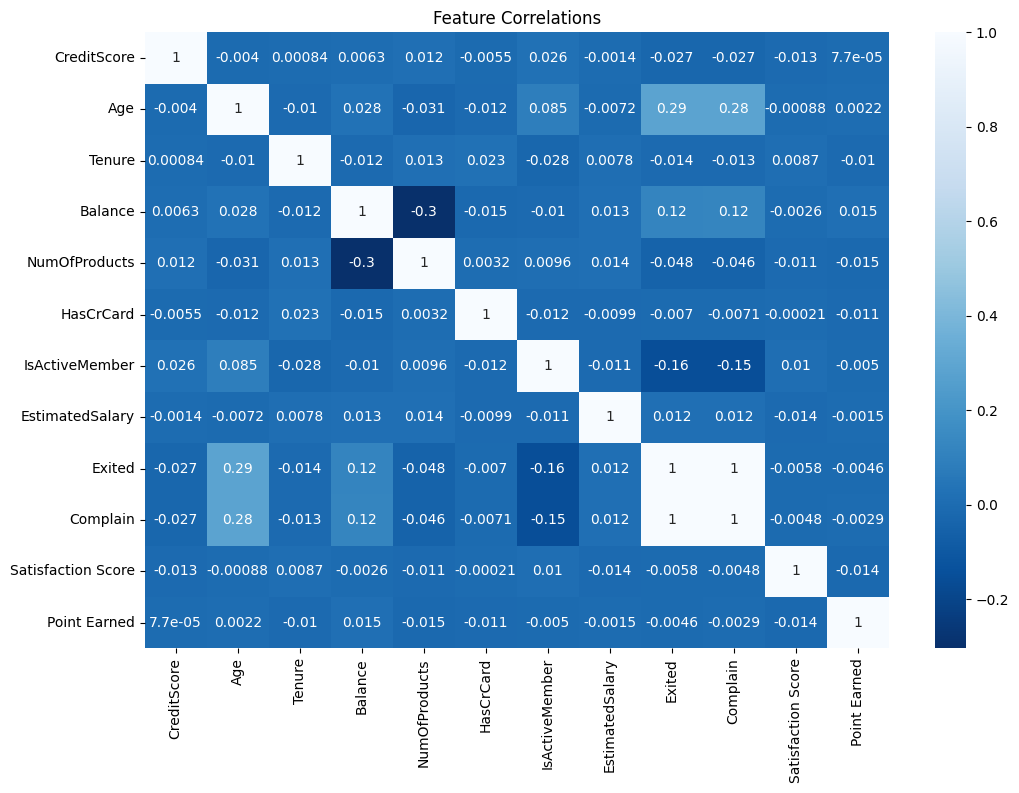

In [139]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = data[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues_r')
plt.title('Feature Correlations')
plt.show()

## Step 3: Feature Engineering

In [71]:
data['BalanceToSalary'] = data['Balance'] / data['EstimatedSalary']
data = pd.get_dummies(data, columns=['Gender', 'Geography', 'Card Type'], drop_first=True)

## Step 4: Train/Test Split

In [74]:
X = data.drop(['Exited', 'CustomerId'], axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 5: Model Training and Evaluation

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2416
        True       0.99      1.00      1.00       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



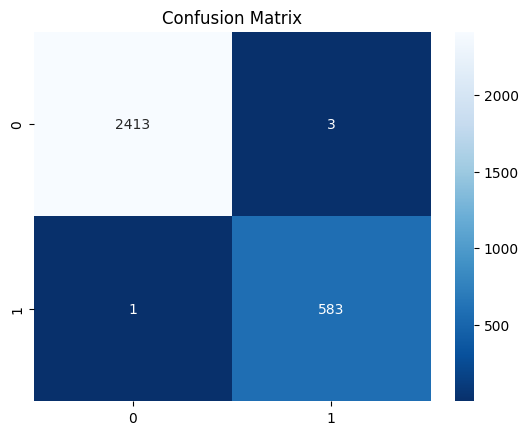

In [75]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues_r')
plt.title('Confusion Matrix')
plt.show()

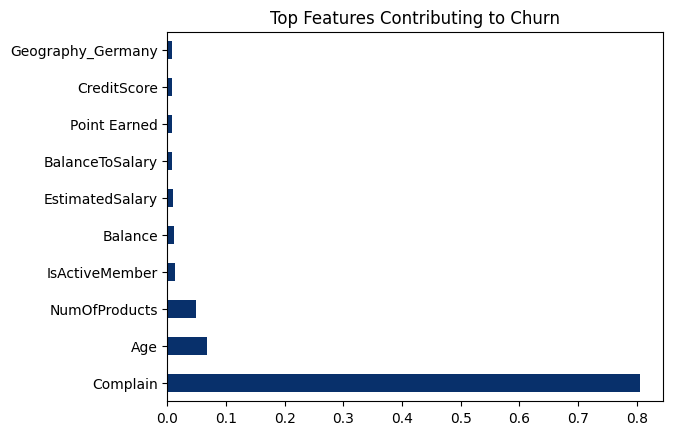

In [76]:
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', colormap='Blues_r')
plt.title('Top Features Contributing to Churn')
plt.show()

## Key Insight
 - Customers that complain are likely to churn.
 
## Recommendations

### Customer Retention
1. **Satisfaction Improvement**:
   - Focus on customers with low satisfaction scores and high tenure.
   - Use feedback from complaints to improve service quality.
2. **Engagement Boost**:
   - Create targeted campaigns for inactive members to encourage usage.
   - Incentivize zero-balance customers to utilize more services.

### Growth Opportunities
1. **Geographic Expansion**:
   - Develop customized offerings for Germany and Spain to increase market share.
2. **Premium Services**:
   - Introduce tiered services for high-income, high-balance customers.

### Risk Mitigation
1. **Credit Risk Segmentation**:
   - Use credit score distributions to classify customers into low, medium, and high-risk categories for tailored financial products.
2. **Retention Focus**:
   - Analyze churn drivers (e.g., satisfaction, tenure, geography) to prevent future customer loss.

---